## SGD for Linear Regression on Boston House Price dataset
Number of Instances: 506 

Number of Attributes: 13 numeric/categorical predictive

Median Value (attribute 14) is usually the target

Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's


In [25]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
import matplotlib.pyplot as plt



In [26]:
#loading boston house price datasets
from sklearn.datasets import load_boston
boston=load_boston()

In [27]:
print(boston.data.shape)

(506, 13)


In [28]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [29]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [30]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [31]:
#converting into dataframe
bost=pd.DataFrame(data=boston.data,columns = boston.feature_names)
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
# spliting the data into train and test
price=boston.target
x_train, x_test, y_train, y_test =train_test_split(bost, price, test_size=0.33, random_state=5)

In [33]:
# applying column standardization on train and test data
s=StandardScaler()
x_train=s.fit_transform(np.array(x_train))
x_test=s.transform(np.array(x_test))

In [34]:
#training data for manual SGD regressor
manual_train=pd.DataFrame(data=x_train)
manual_train['price']=y_train

In [35]:
manual_train.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,27.5
3,-0.406208,0.839388,-0.901940,-0.256978,-1.083710,0.097426,-0.515087,1.600509,-0.411970,-0.624310,-0.860301,0.152292,-0.184576,22.2


In [36]:
# Converting the data into array so that it will be available for SGD regressor and manual too.
x_test = np.array(x_test)
y_test=np.array(y_test)

### SGDregressor:
initial weight = 0.01<br>
power_t = 0.25 <br>
lr_rate_variation = Taking it constant


In [37]:
#the functioning of this function is to use SGDRegressor of sklearn and predict the price

#this function takes alpha, learning rate variation , initial learning rate(eta0), number of iteration , power_t, 
#and all test and train data as an argument

#this function returns weight, intercept and mean squared error
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=100, X_train=x_train, X_test=x_test, Y_train=y_train, Y_test=y_test):
    
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, max_iter=n_iter)
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    
    #scatter plot
    plt.scatter(y_test,y_pred,c = "red")
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=1)
    plt.show()
    
    
    sgd_error=mean_squared_error(y_test,y_pred)
    print('Mean Square Error(MSE)=', sgd_error)
    print('Number of iteration=', n_iter)
    
    return clf.coef_, clf.intercept_, sgd_error

### N_iter=10

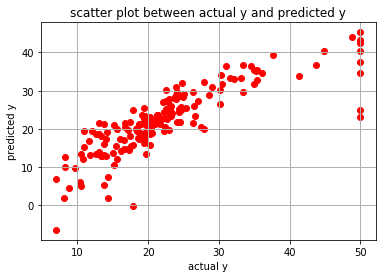

Mean Square Error(MSE)= 27.79603315407043
Number of iteration= 10


In [38]:
w_sgd_10, b_sgd_10, error_sgd_10=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=10)

### N_iter = 100

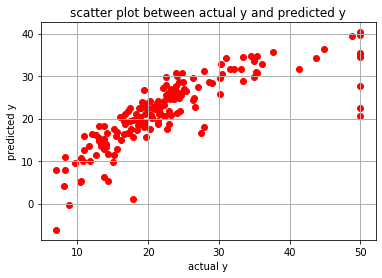

Mean Square Error(MSE)= 32.688823412267055
Number of iteration= 100


In [39]:
w_sgd_100, b_sgd_100, error_sgd_100=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=100)

### N_iter = 1000

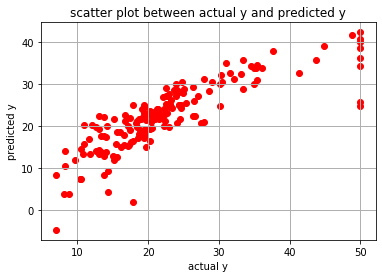

Mean Square Error(MSE)= 27.65087864442112
Number of iteration= 1000


In [40]:
w_sgd_1000, b_sgd_1000, error_sgd_1000=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1000)

### N_iter = 10000

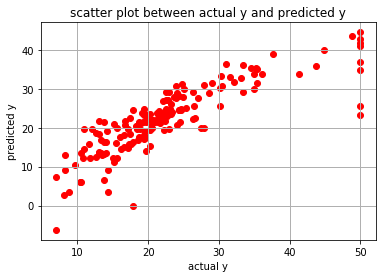

Mean Square Error(MSE)= 27.13236886320927
Number of iteration= 10000


In [41]:
w_sgd_10000, b_sgd_10000, error_sgd_10000=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=10000)

### Manual sgd
power_t = 0.25<br> 
lr_rate=0.01<br> 
lr_rate_variation=constant<br>

In [42]:
# this function of sgd to linear regression, and we didn't use any regularization
# we need to provide the pandas data with price, initial learning rate , and learning rate variation, number of iteration
# here we have implemented constant learning rate and invscaling learning rate
# checking the significant difference in loss i.e stopping condition might take lots of time so here we fix the number of loop 
# this function returns weight (w) and bias (b)
# here we have taken sgd with batch size=10
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return w_new, b_new



def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(x_test,y_pred):
    #scatter plot
    plt.scatter(y_test,y_pred,c="red")
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()
    print('**************************************************************')
    
    
       
    manual_error=mean_squared_error(y_test,y_pred)
    print('error=',manual_error)
    
    return manual_error

### N_iter = 10

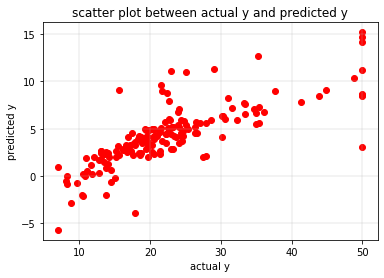

**************************************************************
error= 388.07876917959805


In [43]:
w_10, b_10=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=10)
y_pred_10=pred(x_test, w=w_10, b=b_10)
manual_error_10=plot_(x_test,y_pred_10)

###  N_iter = 100

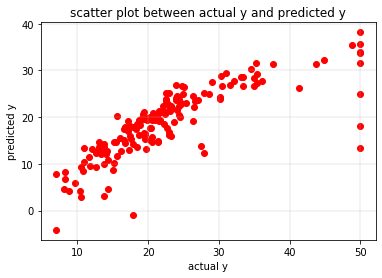

**************************************************************
error= 46.362766365277956


In [44]:
w_100, b_100=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=100)
y_pred_100=pred(x_test, w=w_100, b=b_100)
manual_error_100=plot_(x_test,y_pred_100)

### N_iter = 1000

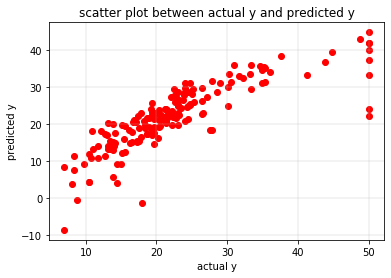

**************************************************************
error= 28.91541794857497


In [45]:
w_1000, b_1000=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1000)
y_pred_1000=pred(x_test, w=w_1000, b=b_1000)
manual_error_1000=plot_(x_test,y_pred_1000)

###  N_iter = 10000

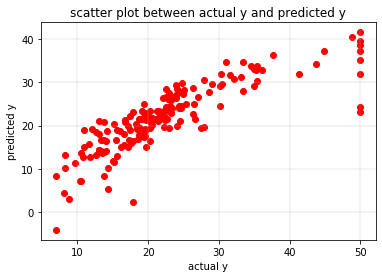

**************************************************************
error= 28.197283952721527


In [46]:
w_10000, b_10000=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=10000)
y_pred_10000=pred(x_test, w=w_10000, b=b_10000)
manual_error_10000=plot_(x_test,y_pred_10000)

In [47]:
x = PrettyTable()

x.field_names = ["No_of_iteration","SGD_regressor_error","Manual_SGD_error","sgd_intercept","manual_intercept"]

x.add_row([10,error_sgd_10,manual_error_10,b_sgd_10,b_10])
x.add_row([100,error_sgd_100,manual_error_100,b_sgd_100,b_100])
x.add_row([1000,error_sgd_1000,manual_error_1000,b_sgd_1000,b_1000])
x.add_row([10000,error_sgd_10000,manual_error_10000,b_sgd_10000,b_10000])
print(x)

+-----------------+---------------------+--------------------+---------------+------------------+
| No_of_iteration | SGD_regressor_error |  Manual_SGD_error  | sgd_intercept | manual_intercept |
+-----------------+---------------------+--------------------+---------------+------------------+
|        10       |  27.79603315407043  | 388.07876917959805 | [23.01648956] |   [4.29939007]   |
|       100       |  32.688823412267055 | 46.362766365277956 | [22.29725327] |  [19.20569337]   |
|       1000      |  27.65087864442112  | 28.91541794857497  | [23.12666564] |  [22.67278635]   |
|      10000      |  27.13236886320927  | 28.197283952721527 | [22.93709869] |  [22.54617736]   |
+-----------------+---------------------+--------------------+---------------+------------------+


## OBSERVATION:
1. As Iteration increases error decreases for SGD_regressor and Manual_SGD_error as well.<br>
2. SGD_intercept and Manual_intercept comes closer as iteration increases.